# MNIST 데이터셋

In [1]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


In [2]:
digit_mnist = keras.datasets.mnist

(_train_images, _train_labels), (test_images, test_labels) = digit_mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [3]:
train_images = _train_images[:50000]
train_labels = _train_labels[:50000]
val_images = _train_images[50000:]
val_labels = _train_labels[50000:]

In [4]:
train_images[0].shape

(28, 28)

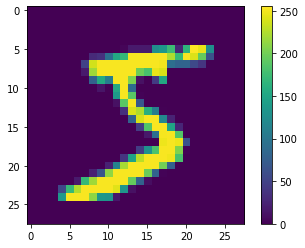

In [5]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# train_images = train_images / 255.0
# test_images = test_images / 255.0

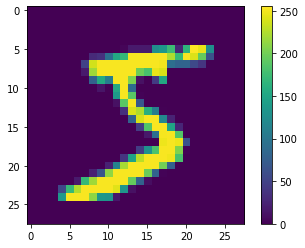

In [6]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
layer_flatten = keras.layers.Flatten(input_shape=(28, 28))
layer_FC1 = keras.layers.Dense(128, activation='relu', use_bias=False)
layer_FC2 = keras.layers.Dense(64, activation='relu', use_bias=False)
layer_FC3 = keras.layers.Dense(10, activation='softmax', use_bias=False)

model = keras.Sequential([
    layer_flatten,
    layer_FC1,
    layer_FC2,
    layer_FC3,
])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100352    
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8192      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                640       
Total params: 109,184
Trainable params: 109,184
Non-trainable params: 0
_________________________________________________________________


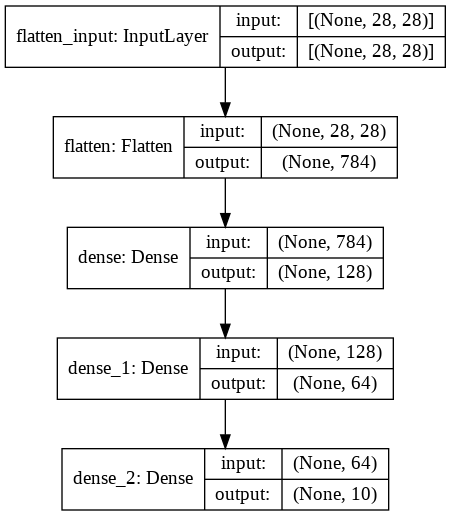

In [8]:
from IPython.display import Image 
from keras.utils.vis_utils import plot_model

tf.keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_dtype=False, show_layer_names=True)

Image('model.png')

In [12]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
model.fit(train_images, train_labels, epochs=30, validation_data=(train_images, train_labels), batch_size=1024)

Epoch 1/30
49/49 [==============================] - 1s 9ms/step - loss: 0.1713 - accuracy: 0.9663 - val_loss: 0.1025 - val_accuracy: 0.9768
Epoch 2/30
49/49 [==============================] - 0s 6ms/step - loss: 0.1287 - accuracy: 0.9736 - val_loss: 0.0813 - val_accuracy: 0.9813
Epoch 3/30
49/49 [==============================] - 0s 5ms/step - loss: 0.0917 - accuracy: 0.9792 - val_loss: 0.0778 - val_accuracy: 0.9808
Epoch 4/30
49/49 [==============================] - 0s 6ms/step - loss: 0.0776 - accuracy: 0.9816 - val_loss: 0.0471 - val_accuracy: 0.9874
Epoch 5/30
49/49 [==============================] - 0s 6ms/step - loss: 0.0512 - accuracy: 0.9865 - val_loss: 0.0417 - val_accuracy: 0.9891
Epoch 6/30
49/49 [==============================] - 0s 7ms/step - loss: 0.0572 - accuracy: 0.9862 - val_loss: 0.0438 - val_accuracy: 0.9889
Epoch 7/30
49/49 [==============================] - 0s 5ms/step - loss: 0.0410 - accuracy: 0.9893 - val_loss: 0.0280 - val_accuracy: 0.9915
Epoch 8/30
49/49 [==

In [14]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\n테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.5153 - accuracy: 0.9646

테스트 정확도: 0.9646000266075134


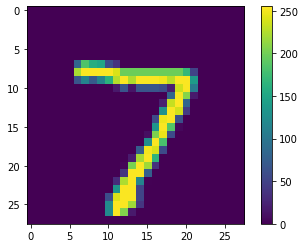

In [15]:
plt.figure()
plt.imshow(test_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [16]:
predictions = model.predict(test_images[:1, :, :])
print(predictions)

[[0.0000000e+00 0.0000000e+00 1.8672607e-32 1.1846864e-25 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.0000000e+00 0.0000000e+00 0.0000000e+00]]


In [17]:
np.argmax(predictions)

7

In [18]:
print(test_images[0, :, :].shape)

(28, 28)


In [32]:
model.save('mnist_dkdk_FP32_20170708_v1.h5')

In [43]:
import cv2

for i in range(10):
    inp = cv2.imread('{}.png'.format(i), cv2.IMREAD_GRAYSCALE)
    inp = inp.reshape(1, 28, 28)
    print(inp.shape)
    predictions = model.predict(inp)
    print('==', i, '==')
    print(predictions)
    print(np.argmax(predictions))

(1, 28, 28)
== 0 ==
[[1.0000000e+00 0.0000000e+00 3.3974477e-26 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.6024496e-25]]
0
(1, 28, 28)
== 1 ==
[[0.0000000e+00 1.0000000e+00 5.3088872e-26 2.9026112e-34 5.6169461e-15
  1.1430732e-30 7.3222651e-25 0.0000000e+00 7.9106371e-27 1.0473790e-31]]
1
(1, 28, 28)
== 2 ==
[[0.0000000e+00 4.5906898e-27 1.0000000e+00 9.2746137e-35 0.0000000e+00
  0.0000000e+00 0.0000000e+00 1.4511191e-27 0.0000000e+00 0.0000000e+00]]
2
(1, 28, 28)
== 3 ==
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]
3
(1, 28, 28)
== 4 ==
[[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  1.6995763e-25 5.1762853e-32 1.1409783e-29 2.2797794e-28 3.1332357e-09]]
4
(1, 28, 28)
== 5 ==
[[0.0000000e+00 0.0000000e+00 1.9428405e-36 7.1902852e-11 0.0000000e+00
  1.0000000e+00 0.0000000e+00 0.0000000e+00 8.1929473e-33 8.9462241e-21]]
5
(1, 28, 28)
== 6 ==
[[3.1443237e-16 0.0000000e+00 0.0000000e+00 1.2406333e-30 2.7327136e-37
  6.6898082e